<a href="https://colab.research.google.com/github/aayush1324/Scaler_DSML2022/blob/main/Jamboree_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp

In [ ]:
from scipy.stats import binom , norm , poisson , expon ,geom

In [ ]:
from scipy.stats import ttest_ind , ttest_rel , f_oneway , kruskal
from scipy.stats import norm , chi2 , f
from scipy.stats import chi2_contingency , chisquare
from scipy.stats import pearsonr , spearmanr
from scipy.stats import kstest

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
! wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv" -O Jamboree_Admission.csv

--2023-01-24 16:35:12--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.39.48, 13.35.39.136, 13.35.39.72, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.39.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2023-01-24 16:35:13 (37.7 MB/s) - ‘Jamboree_Admission.csv’ saved [16176/16176]



In [ ]:
df = pd.read_csv("Jamboree_Admission.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **Drop** **Column**

In [ ]:
df.drop("Serial No." , axis = 1 , inplace = True )

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Comment** - "Serial No." is an extra column which is same as index column with difference 1. So , we drop that extra column "Serial No." 

# ***Unique Values***


***CATEGORY***

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

[]

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)

for cat in cat_col:
  print(cat)
  print(df[cat].nunique())
  print("")
  

In [ ]:
len(cat_col)

0

**Comment** - There is no Categorical columns

***NUMERIC***

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)

for num in num_col:
  print(num)
  print(df[num].nunique())
  print("")

GRE Score
49

TOEFL Score
29

University Rating
5

SOP
9

LOR 
9

CGPA
184

Research
2

Chance of Admit 
61



In [ ]:
len(num_col)

8

**Comment** - There are total 8  Numerical columns which has unique values are different for all columns.

# ***Value Counts***

***CATEGORY***

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

[]

In [ ]:
for cat in (cat_col):
  print(df[cat].value_counts())
  print("")
  print("")

In [ ]:
len(cat_col)

0

**Comment** - There is no Categorical columns

***NUMERIC***

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [ ]:
for num in (num_col):
  print(df[num].value_counts())
  print("")
  print("")

312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64


110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64


3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64


4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42

In [ ]:
len(num_col)

8

**Comment** - There are total 8  Numerical columns which has unique values are different for all columns and have value counts.

# ***Observations***

In [ ]:
df.shape

(500, 8)

In [ ]:
len(df)

500

In [ ]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

**Comment** - There are total 500 rows and all columns have data types is numerical (e.g. Integer and float Values).

# ***Missing Value***

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
percent_missing = (df.isnull().sum())/(len(df))
percent_missing

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

**Comment** - There are no missing values in any column of the data.

# ***Statistical Summary***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.describe(include = "all")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# **Univariate Analysis**

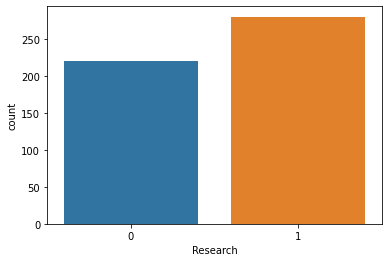

In [ ]:
sns.countplot(x = "Research" , data = df  )
plt.show()

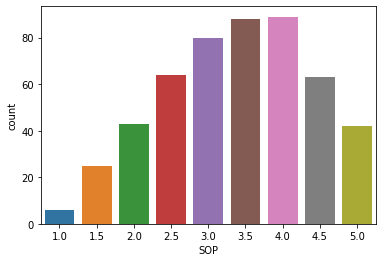

In [ ]:
sns.countplot(x = "SOP" , data = df )
plt.show()

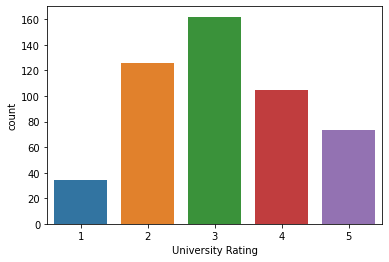

In [ ]:
sns.countplot(x = "University Rating" , data = df )
plt.show()

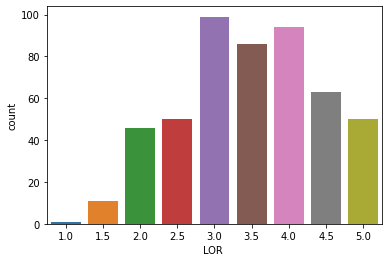

In [ ]:
sns.countplot(x = "LOR " , data = df )
plt.show()

***GRE Score***

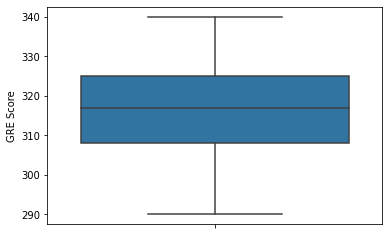

In [ ]:
sns.boxplot(y = "GRE Score" , data = df )
plt.show()

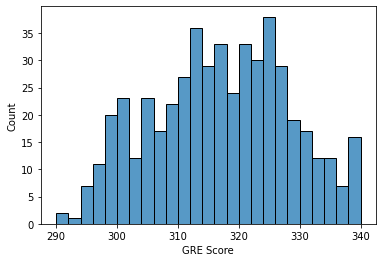

In [ ]:
sns.histplot(df["GRE Score"] , bins = 25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


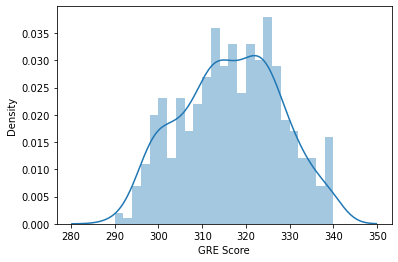

In [ ]:
sns.distplot(df["GRE Score"] , bins = 25)
plt.show()

***TOEFL Score***

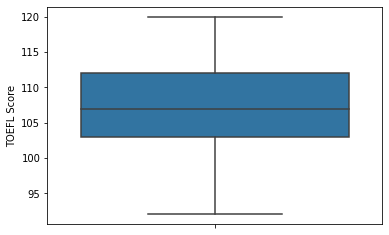

In [ ]:
sns.boxplot(y = "TOEFL Score" , data = df )
plt.show()

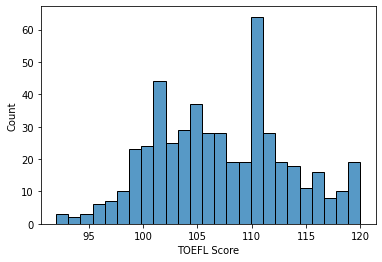

In [ ]:
sns.histplot(df["TOEFL Score"] , bins = 25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


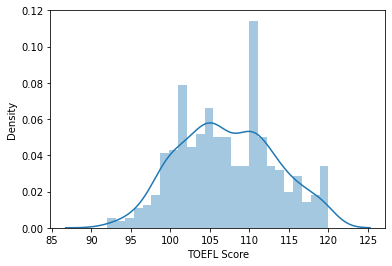

In [ ]:
sns.distplot(df["TOEFL Score"] , bins = 25)
plt.show()

***CGPA***

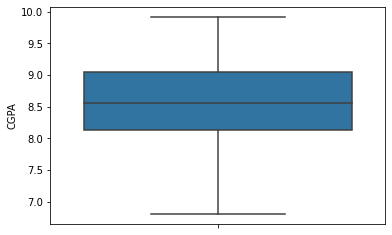

In [ ]:
sns.boxplot(y = "CGPA" , data = df )
plt.show()

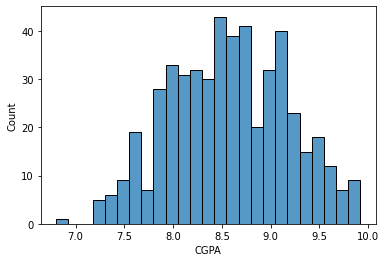

In [ ]:
sns.histplot(df["CGPA"] , bins = 25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


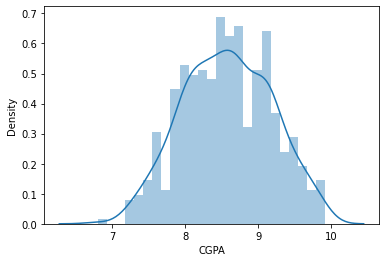

In [ ]:
sns.distplot(df["CGPA"] , bins = 25)
plt.show()

***Chance of Admit***

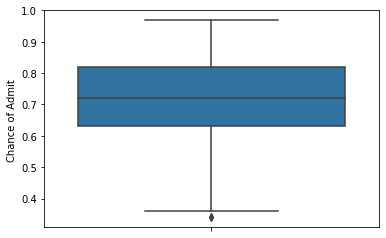

In [ ]:
sns.boxplot(y = "Chance of Admit " , data = df )
plt.show()

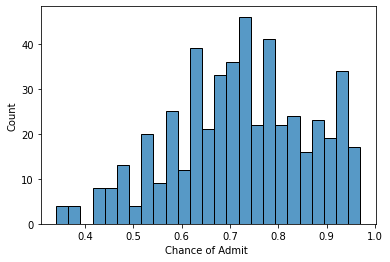

In [ ]:
sns.histplot(df["Chance of Admit "] , bins = 25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


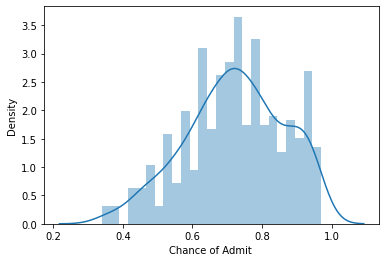

In [ ]:
sns.distplot(df["Chance of Admit "] , bins = 25)
plt.show()

# ***Bivariate Analysis***

***GRE Score***

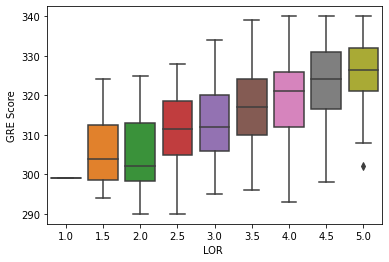

In [ ]:
sns.boxplot(y = "GRE Score" , x = "LOR " , data =df)
plt.show()

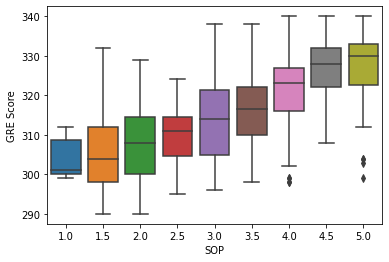

In [ ]:
sns.boxplot(y = "GRE Score" , x = "SOP" , data =df)
plt.show()

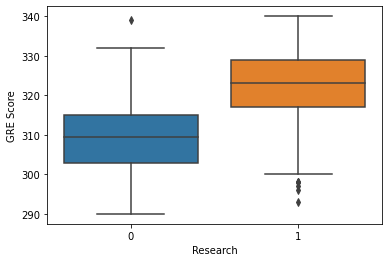

In [ ]:
sns.boxplot(y = "GRE Score" , x = "Research" , data =df)
plt.show()

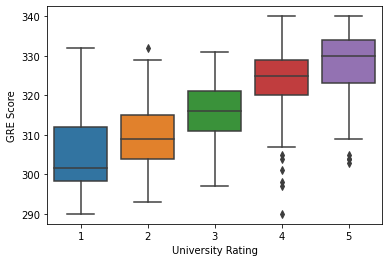

In [ ]:
sns.boxplot(y = "GRE Score" , x = "University Rating" , data =df)
plt.show()

***TOEFL Score***

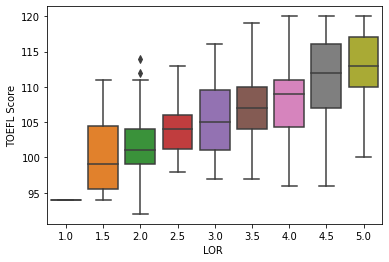

In [ ]:
sns.boxplot(y = "TOEFL Score" , x = "LOR " , data =df)
plt.show()

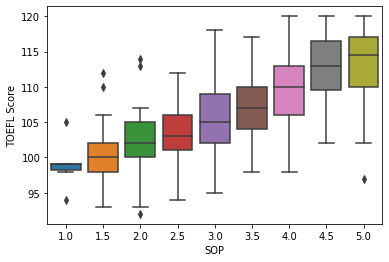

In [ ]:
sns.boxplot(y = "TOEFL Score" , x = "SOP" , data =df)
plt.show()

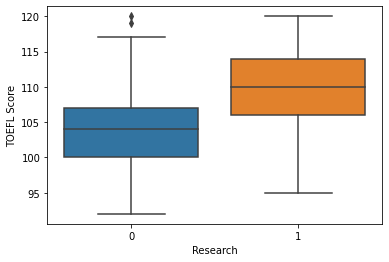

In [ ]:
sns.boxplot(y = "TOEFL Score" , x = "Research" , data =df)
plt.show()

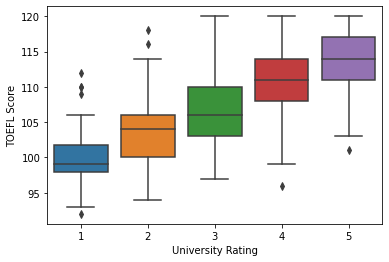

In [ ]:
sns.boxplot(y = "TOEFL Score" , x = "University Rating" , data =df)
plt.show()

***CGPA***

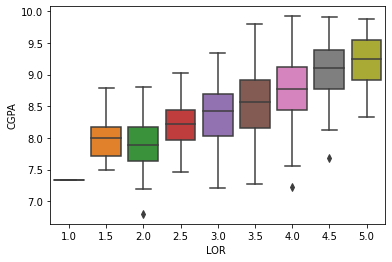

In [ ]:
sns.boxplot(y = "CGPA" , x = "LOR " , data =df)
plt.show()

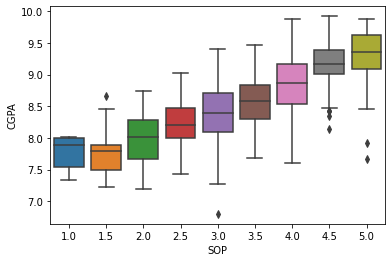

In [ ]:
sns.boxplot(y = "CGPA" , x = "SOP" , data =df)
plt.show()

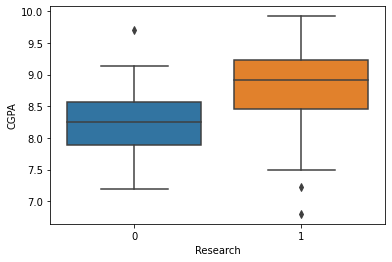

In [ ]:
sns.boxplot(y = "CGPA" , x = "Research" , data =df)
plt.show()

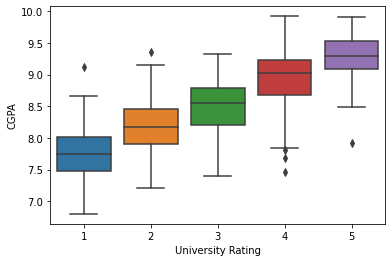

In [ ]:
sns.boxplot(y = "CGPA" , x = "University Rating" , data =df)
plt.show()

***Chance of Admit***

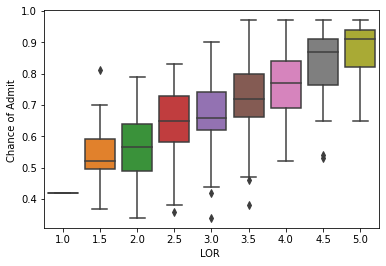

In [ ]:
sns.boxplot(y = "Chance of Admit " , x = "LOR " , data =df)
plt.show()

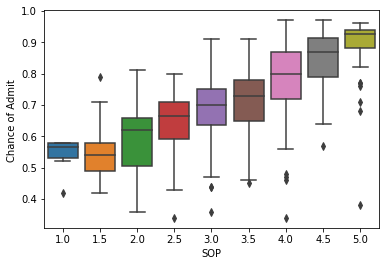

In [ ]:
sns.boxplot(y = "Chance of Admit " , x = "SOP" , data =df)
plt.show()

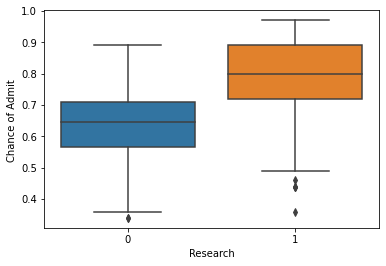

In [ ]:
sns.boxplot(y = "Chance of Admit " , x = "Research" , data =df)
plt.show()

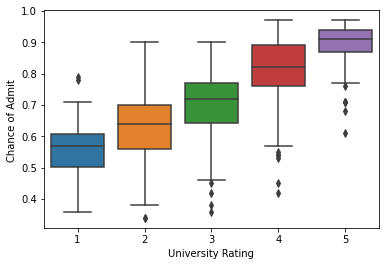

In [ ]:
sns.boxplot(y = "Chance of Admit " , x = "University Rating" , data =df)
plt.show()

# ***Multivariate Analysis***

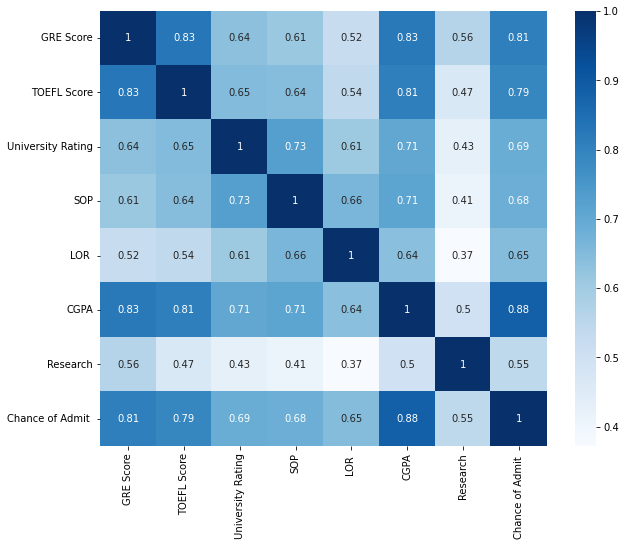

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data =df.corr() , cmap = "Blues" , annot = True )
plt.show()

**Some insights on correlation :**

1. GRE score is highly correlated with chance of admit
2. TOEFL score is highlty correlated with chanse of admit.
3. CGPA is also highly correlated with chanse of admit.
4. University rating, SOP and LOR are almost samely correlated with taget variable which is chanse to admit.


# ***Range of Attributes***

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)

for num in num_col:
  print(num)
  print(df[num].min())
  print(df[num].max())
  print("")

GRE Score
290
340

TOEFL Score
92
120

University Rating
1
5

SOP
1.0
5.0

LOR 
1.0
5.0

CGPA
6.8
9.92

Research
0
1

Chance of Admit 
0.34
0.97



# ***Outliers***

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

GRE Score


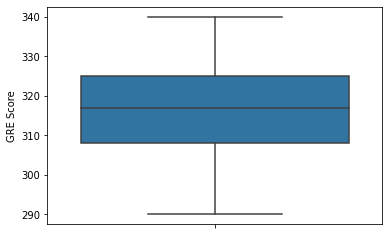


TOEFL Score


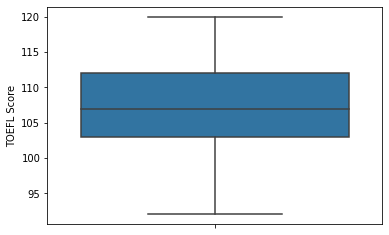


University Rating


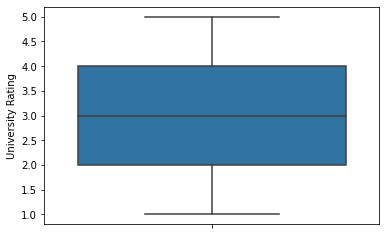


SOP


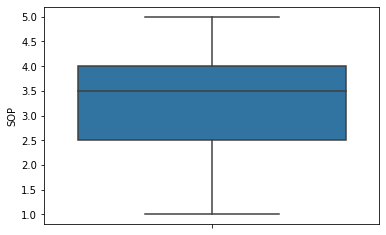


LOR 


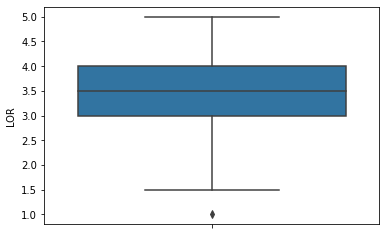


CGPA


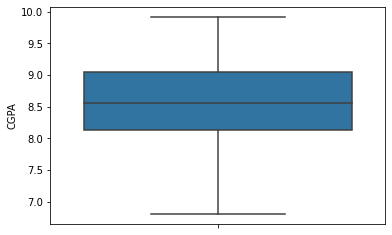


Research


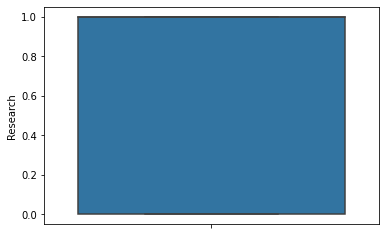


Chance of Admit 


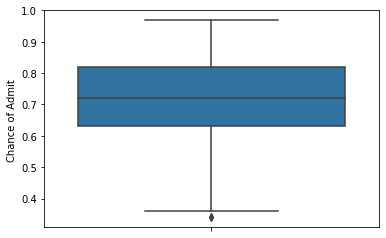

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)

for num in num_col:
  print(num)
  sns.boxplot(y = num , data = df )
  plt.show()
  print("")

**Comment** - As we can see there is no outliers present in any column of the data.

# ***Duplicate Value Check***

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

**Comment** - There are no Duplicate values in the data. 

# ***Feature Engineering***

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop("Chance of Admit " , axis=1 , inplace = True)

In [ ]:
ssscaler = StandardScaler()

In [ ]:
ss_df = ssscaler.fit_transform(df_copy)

In [ ]:
ss_df = pd.DataFrame(ss_df , columns = df_copy.columns)

In [ ]:
ss_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [ ]:
ss_df.mean()

GRE Score            1.762146e-15
TOEFL Score          1.136868e-15
University Rating    1.421085e-16
SOP                 -8.526513e-17
LOR                  4.263256e-17
CGPA                 3.119283e-15
Research            -7.815970e-17
dtype: float64

In [ ]:
ss_df.std()

GRE Score            1.001002
TOEFL Score          1.001002
University Rating    1.001002
SOP                  1.001002
LOR                  1.001002
CGPA                 1.001002
Research             1.001002
dtype: float64

In [ ]:
mmscaler = MinMaxScaler()

In [ ]:
mm_df = mmscaler.fit_transform(df_copy)

In [ ]:
mm_df = pd.DataFrame(mm_df , columns = df_copy.columns)

In [ ]:
mm_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


# **Multiple Linear Regression without using Scaler**

In [ ]:
x = df.iloc[: , :-1].values

In [ ]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [ ]:
y = df.iloc[: , -1].values

In [ ]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
y = y.reshape(len(y) ,1)

In [ ]:
y.shape

(500, 1)

In [ ]:
x = np.insert(x , 0 , 1 , axis=1)

In [ ]:
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   9.65,   1.  ],
       [  1.  , 324.  , 107.  , ...,   4.5 ,   8.87,   1.  ],
       [  1.  , 316.  , 104.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [  1.  , 330.  , 120.  , ...,   5.  ,   9.56,   1.  ],
       [  1.  , 312.  , 103.  , ...,   5.  ,   8.43,   0.  ],
       [  1.  , 327.  , 113.  , ...,   4.5 ,   9.04,   0.  ]])

In [ ]:
x.shape

(500, 8)

In [ ]:
def predict(x,w):
  """
  x : (n,d+1)
  w : (d+1,1)
  """
  return np.dot(x,w)

In [ ]:
def error (x,y,w):
  """
  x : (n,d+1)
  y : (n,1)
  w : (d+1,1)
  """
  y_hat_ws = predict(x,w)
  err = np.mean((y-y_hat)**2)

  return err

In [ ]:
def gradient (x,y,w):

  B = predict(x,w) - y
  grad = np.dot(x.T , B)

  return 2*grad/len(x)

In [ ]:
def gradient_descent (x , y , max_iter= 10 , learning_rate = 0.0000001):

  w = np.random.randn(x.shape[1] ,1)
  error_list = []

  for i in range (max_iter):

    e = error(x,y,w)
    error_list.append(e)

    grad = gradient(x,y,w)

    w = w - learning_rate*grad

  return w.round(3) , error_list

# **Multiple Linear Regression by using MinMaxScaler**

In [ ]:
x = mm_df.iloc[: , :].values

In [ ]:
x

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

In [ ]:
y = df.iloc[: , -1].values

In [ ]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
y = y.reshape(len(y) ,1)

In [ ]:
y.shape

(500, 1)

In [ ]:
x = np.insert(x , 0 , 1 , axis=1)

In [ ]:
x

array([[1.        , 0.94      , 0.92857143, ..., 0.875     , 0.91346154,
        1.        ],
       [1.        , 0.68      , 0.53571429, ..., 0.875     , 0.66346154,
        1.        ],
       [1.        , 0.52      , 0.42857143, ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [1.        , 0.8       , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [1.        , 0.44      , 0.39285714, ..., 1.        , 0.5224359 ,
        0.        ],
       [1.        , 0.74      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

In [ ]:
x.shape

(500, 8)

In [ ]:
def predict(x,w):
  """
  x : (n,d+1)
  w : (d+1,1)
  """
  return np.dot(x,w)

In [ ]:
def error (x,y,w):
  """
  x : (n,d+1)
  y : (n,1)
  w : (d+1,1)
  """
  y_hat = predict(x,w)
  err = np.mean((y-y_hat)**2)

  return err

In [ ]:
def gradient (x,y,w):

  B = predict(x,w) - y
  grad = np.dot(x.T , B)

  return 2*grad/len(x)

In [ ]:
def gradient_descent (x , y , max_iter=1000 , learning_rate = 0.1):

  w = np.random.randn(x.shape[1] ,1)
  error_list = []

  for i in range (max_iter):

    e = error(x,y,w)
    error_list.append(e)

    grad = gradient(x,y,w)

    w = w - learning_rate*grad

  return w.round(3) , error_list

In [ ]:
w_best , error_list = gradient_descent(x,y)

In [ ]:
w_best

array([[ 0.328],
       [-0.018],
       [ 0.011],
       [ 0.02 ],
       [-0.034],
       [ 0.037],
       [ 0.648],
       [ 0.027]])

In [ ]:
error_list

[5.04814143252079,
 0.8354279125004946,
 0.4178703795167368,
 0.36005368797867127,
 0.33745706071768883,
 0.3193453756783332,
 0.30273369570521486,
 0.28726362270957645,
 0.27283030548124415,
 0.25935794709150134,
 0.24677823564035128,
 0.23502796486735866,
 0.22404849173709904,
 0.21378539047866493,
 0.2041881464932187,
 0.1952098737999617,
 0.1868070530476884,
 0.17893928848399218,
 0.17156908249913408,
 0.16466162647192562,
 0.15818460673804716,
 0.15210802458667694,
 0.1464040292704977,
 0.14104676308759434,
 0.13601221766189087,
 0.13127810061197528,
 0.12682371185678834,
 0.12262982886103811,
 0.11867860017364783,
 0.11495344665934383,
 0.11143896986689987,
 0.10812086701782178,
 0.10498585213661243,
 0.10202158287840553,
 0.0992165926419014,
 0.09656022758535403,
 0.0940425881910171,
 0.09165447504911443,
 0.08938733855620057,
 0.08723323224485446,
 0.08518476948213018,
 0.08323508329318573,
 0.08137778908413487,
 0.07960695005451399,
 0.07791704510492099,
 0.07630293905945071,


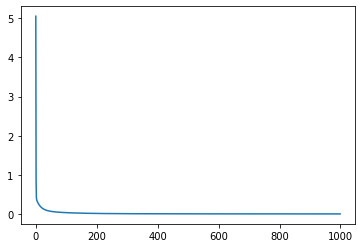

In [ ]:
plt.plot(error_list)

In [ ]:
y_hat = predict(x,w_best)

In [ ]:
def r2_score (y, y_hat):

  num = np.sum((y-y_hat)**2)
  den = np.sum((y-y.mean())**2)

  r2 = 1-(num/den)

  return r2

In [ ]:
r2_score(y,y_hat)

0.7903660060179235

# **Multiple Linear Regression by using Standard Scaler**

In [ ]:
x = ss_df.iloc[: , :].values

In [ ]:
x

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [ ]:
y = df.iloc[: , -1].values

In [ ]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
y = y.reshape(len(y) ,1)

In [ ]:
y.shape

(500, 1)

In [ ]:
x = np.insert(x , 0 , 1 , axis=1)

In [ ]:
x

array([[ 1.        ,  1.81923762,  1.77886545, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 1.        ,  0.66714832, -0.03160087, ...,  1.09894429,
         0.48585943,  0.88640526],
       [ 1.        , -0.0418297 , -0.52536441, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.        ,  1.19888185,  2.10804114, ...,  1.63976333,
         1.62785086,  0.88640526],
       [ 1.        , -0.39631872, -0.68995225, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 1.        ,  0.93301508,  0.95592621, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [ ]:
x.shape

(500, 8)

In [ ]:
def predict(x,w):
  """
  x : (n,d+1)
  w : (d+1,1)
  """
  return np.dot(x,w)

In [ ]:
def error (x,y,w):
  """
  x : (n,d+1)
  y : (n,1)
  w : (d+1,1)
  """
  y_hat = predict(x,w)
  err = np.mean((y-y_hat)**2)

  return err

In [ ]:
def gradient (x,y,w):

  B = predict(x,w) - y
  grad = np.dot(x.T , B)

  return 2*grad/len(x)

In [ ]:
def gradient_descent (x , y , max_iter= 1000 , learning_rate = 0.01):

  w = np.random.randn(x.shape[1] ,1)
  error_list = []

  for i in range (max_iter):

    e = error(x,y,w)
    error_list.append(e)

    grad = gradient(x,y,w)

    w = w - learning_rate*grad

  return w.round(3) , error_list

In [ ]:
w_best , error_list = gradient_descent(x,y)

In [ ]:
w_best

array([[0.722],
       [0.028],
       [0.001],
       [0.005],
       [0.002],
       [0.014],
       [0.083],
       [0.01 ]])

In [ ]:
error_list

[13.38082000521864,
 11.436151241649428,
 9.826971455952435,
 8.493364511244684,
 7.386187664823732,
 6.46513177722645,
 5.697130887272826,
 5.055058226756055,
 4.516657082615464,
 4.063664207107996,
 3.6810910953883766,
 3.3566346964980305,
 3.080194245225826,
 2.8434751012964843,
 2.639663925018941,
 2.463162341114017,
 2.3093685566280153,
 2.174498296198665,
 2.055437973550619,
 1.949624293514806,
 1.8549455245574873,
 1.7696605391486964,
 1.692332422220799,
 1.6217740242805503,
 1.5570033082468586,
 1.4972067264883588,
 1.4417091821592893,
 1.3899493893471726,
 1.341459660055934,
 1.2958493211017599,
 1.2527911075228686,
 1.2120099967775924,
 1.1732740444838297,
 1.136386861554608,
 1.1011814374390514,
 1.0675150673516272,
 1.035265184969141,
 1.004325937819458,
 0.9746053718926981,
 0.9460231160342076,
 0.9185084763796092,
 0.8919988672451771,
 0.8664385181306861,
 0.84177740735073,
 0.8179703817138573,
 0.7949764289689347,
 0.7727580757237084,
 0.7512808884483122,
 0.730513059200

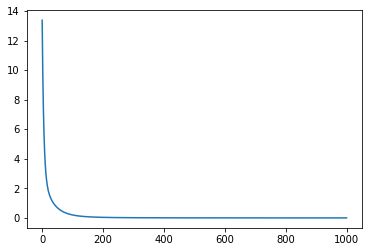

In [ ]:
plt.plot(error_list)

In [ ]:
y_hat = predict(x,w_best)

In [ ]:
def r2_score (y, y_hat):

  num = np.sum((y-y_hat)**2)
  den = np.sum((y-y.mean())**2)

  r2 = 1-(num/den)

  return r2

In [ ]:
r2_score(y,y_hat)

0.8178903279251266

# **Sci-kit Learn Multiple Linear Regression without using Scaler**

In [ ]:
x = df.iloc[: , :-1]

In [ ]:
y = df.iloc[: , -1].values

In [ ]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
L = LinearRegression()

In [ ]:
L.fit(x,y)

LinearRegression()

In [ ]:
y_hat_ws = L.predict(x)
y_hat_ws

array([0.95188302, 0.80403133, 0.65344812, 0.7445193 , 0.63154964,
       0.87449345, 0.70873689, 0.59658817, 0.55037924, 0.7166568 ,
       0.73230708, 0.8361088 , 0.85258378, 0.64376819, 0.64333755,
       0.64765144, 0.71535936, 0.65773635, 0.73739029, 0.65098033,
       0.61722139, 0.7016542 , 0.92700657, 0.96173916, 0.9588498 ,
       0.9630366 , 0.76315152, 0.51895532, 0.42608928, 0.48762151,
       0.60173397, 0.71664474, 0.92176606, 0.93714633, 0.95539958,
       0.85995516, 0.65453013, 0.53816237, 0.50482378, 0.58365522,
       0.6476116 , 0.65630992, 0.68337649, 0.84196389, 0.88546532,
       0.83497493, 0.89804598, 0.93750178, 0.80611696, 0.75506225,
       0.68278595, 0.61474312, 0.71933504, 0.69304722, 0.65695951,
       0.5898518 , 0.54253815, 0.50480029, 0.43058924, 0.622548  ,
       0.60248697, 0.62091394, 0.64323028, 0.70633145, 0.74818254,
       0.78373966, 0.78968732, 0.73240017, 0.8247072 , 0.8603845 ,
       0.95657045, 0.96154284, 0.89418791, 0.80071339, 0.76281

In [ ]:
ws_R2_score = L.score(x,y)
ws_R2_score

0.8219007395178417

In [ ]:
ws_coefficient = L.coef_
ws_coefficient

array([0.00185851, 0.00277797, 0.00594137, 0.00158614, 0.01685874,
       0.11838505, 0.02430748])

In [ ]:
ws_intercept = L.intercept_
ws_intercept

-1.2757250829969908

In [ ]:
coeff = pd.DataFrame()                                    # GRE score has highest weight than the other features
X_c = x                                                   # 3rd highest weight is on CGPA score.
coeff["Features"] = X_c.columns
coeff["Coefficients"] = L.coef_
coeff["Coefficients"] = round(coeff["Coefficients"], 5)
coeff

,Features,Coefficients
0,GRE Score,0.00186
1,TOEFL Score,0.00278
2,University Rating,0.00594
3,SOP,0.00159
4,LOR,0.01686
5,CGPA,0.11839
6,Research,0.02431


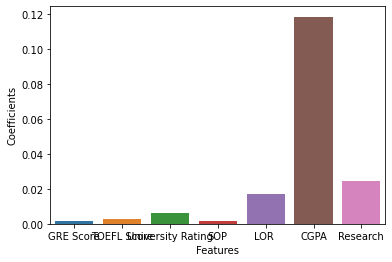

In [ ]:
sns.barplot(x="Features",y="Coefficients",data=coeff)
plt.show()

### **Train Test Split**

In [ ]:
x_train ,  x_test , y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 2)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,316,103,2,2.0,4.5,8.74,0
490,307,105,2,2.5,4.5,8.12,1
53,324,112,4,4.0,2.5,8.10,1
336,319,110,3,3.0,2.5,8.79,0
154,326,108,3,3.0,3.5,8.89,0
...,...,...,...,...,...,...,...
22,328,116,5,5.0,5.0,9.50,1
72,321,111,5,5.0,5.0,9.45,1
493,300,95,2,3.0,1.5,8.22,1
15,314,105,3,3.5,2.5,8.30,0


In [ ]:
y_train

array([0.69, 0.67, 0.72, 0.72, 0.8 , 0.77, 0.72, 0.68, 0.68, 0.69, 0.57,
       0.86, 0.59, 0.77, 0.93, 0.71, 0.89, 0.63, 0.59, 0.73, 0.93, 0.78,
       0.46, 0.77, 0.71, 0.85, 0.72, 0.8 , 0.68, 0.57, 0.95, 0.54, 0.73,
       0.77, 0.47, 0.6 , 0.94, 0.57, 0.93, 0.71, 0.89, 0.65, 0.75, 0.52,
       0.92, 0.65, 0.79, 0.68, 0.75, 0.49, 0.71, 0.83, 0.86, 0.72, 0.8 ,
       0.73, 0.54, 0.89, 0.92, 0.94, 0.63, 0.7 , 0.95, 0.36, 0.71, 0.89,
       0.66, 0.93, 0.8 , 0.53, 0.68, 0.71, 0.68, 0.49, 0.64, 0.77, 0.61,
       0.52, 0.86, 0.9 , 0.91, 0.63, 0.73, 0.62, 0.73, 0.78, 0.91, 0.68,
       0.65, 0.65, 0.74, 0.73, 0.94, 0.75, 0.93, 0.95, 0.7 , 0.88, 0.87,
       0.83, 0.79, 0.88, 0.6 , 0.62, 0.67, 0.84, 0.46, 0.64, 0.58, 0.69,
       0.75, 0.83, 0.42, 0.95, 0.9 , 0.88, 0.47, 0.42, 0.73, 0.72, 0.8 ,
       0.48, 0.79, 0.63, 0.86, 0.94, 0.84, 0.65, 0.84, 0.81, 0.75, 0.67,
       0.71, 0.89, 0.85, 0.69, 0.57, 0.78, 0.34, 0.76, 0.46, 0.56, 0.96,
       0.78, 0.86, 0.67, 0.62, 0.74, 0.65, 0.87, 0.

In [ ]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
129,333,118,5,5.0,5.0,9.35,1
280,311,102,3,4.5,4.0,8.64,1
440,305,104,2,2.5,1.5,7.79,0
384,340,113,4,5.0,5.0,9.74,1
225,296,99,2,2.5,2.5,8.03,0
...,...,...,...,...,...,...,...
387,307,105,2,2.0,3.5,8.10,0
117,290,104,4,2.0,2.5,7.46,0
468,323,110,4,4.0,5.0,8.88,1
395,324,110,3,3.5,3.5,9.04,1


In [ ]:
y_test

array([0.92, 0.68, 0.53, 0.96, 0.61, 0.65, 0.76, 0.55, 0.47, 0.66, 0.67,
       0.58, 0.53, 0.77, 0.38, 0.7 , 0.69, 0.54, 0.8 , 0.9 , 0.89, 0.74,
       0.71, 0.47, 0.55, 0.89, 0.63, 0.74, 0.62, 0.64, 0.71, 0.95, 0.51,
       0.94, 0.64, 0.77, 0.85, 0.78, 0.68, 0.7 , 0.85, 0.97, 0.83, 0.94,
       0.64, 0.8 , 0.79, 0.97, 0.9 , 0.8 , 0.58, 0.56, 0.9 , 0.74, 0.71,
       0.61, 0.91, 0.57, 0.96, 0.79, 0.62, 0.7 , 0.77, 0.94, 0.73, 0.76,
       0.75, 0.61, 0.46, 0.76, 0.49, 0.64, 0.64, 0.93, 0.82, 0.86, 0.78,
       0.61, 0.37, 0.58, 0.49, 0.76, 0.7 , 0.78, 0.94, 0.73, 0.79, 0.76,
       0.58, 0.8 , 0.72, 0.94, 0.89, 0.57, 0.81, 0.53, 0.45, 0.81, 0.82,
       0.75])

In [ ]:
L = LinearRegression()

In [ ]:
L.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat_ws_tt = L.predict(x_train)
y_hat_ws_tt

array([0.72490918, 0.66708063, 0.6973767 , 0.72737273, 0.76634632,
       0.70645657, 0.73367545, 0.69947742, 0.59950639, 0.65734353,
       0.59143021, 0.83458646, 0.53553718, 0.76673344, 0.88849388,
       0.68546161, 0.82184999, 0.59398176, 0.69206408, 0.7737937 ,
       0.90895854, 0.79490863, 0.42466504, 0.7014694 , 0.60804983,
       0.85800811, 0.74026568, 0.82943654, 0.82469469, 0.5178729 ,
       0.94489934, 0.56031169, 0.73323705, 0.79555169, 0.45318267,
       0.52446705, 0.9601697 , 0.57062618, 0.90845447, 0.6603117 ,
       0.88604392, 0.5994157 , 0.74783162, 0.73782464, 0.89804548,
       0.66212288, 0.82004826, 0.60874732, 0.65210565, 0.50926085,
       0.78540732, 0.84825562, 0.82802427, 0.63243004, 0.78002717,
       0.6808791 , 0.48951235, 0.90817458, 0.89651503, 0.94089823,
       0.70378672, 0.68708814, 0.89334044, 0.53057399, 0.73823258,
       0.86349236, 0.72148021, 0.88836084, 0.74593279, 0.68236381,
       0.69262524, 0.70476936, 0.63827891, 0.51041391, 0.66467

In [ ]:
ws_R2_score_tt = L.score(x,y)
ws_R2_score_tt

0.8214651655098203

In [ ]:
ws_coefficient_tt = L.coef_
ws_coefficient_tt

array([0.00213412, 0.00295079, 0.00484241, 0.00209556, 0.0186002 ,
       0.11336157, 0.02471331])

In [ ]:
ws_intercept_tt = L.intercept_
ws_intercept_tt

-1.3417606298509228

# **Sci-kit Learn Multiple Linear Regression by using MinMaxScaler**

In [ ]:
x = mm_df.iloc[: , :]

In [ ]:
y = df.iloc[: , -1].values

In [ ]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [ ]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
L = LinearRegression()

In [ ]:
L.fit(x,y)

LinearRegression()

In [ ]:
y_hat_mm = L.predict(x)
y_hat_mm

array([0.95188302, 0.80403133, 0.65344812, 0.7445193 , 0.63154964,
       0.87449345, 0.70873689, 0.59658817, 0.55037924, 0.7166568 ,
       0.73230708, 0.8361088 , 0.85258378, 0.64376819, 0.64333755,
       0.64765144, 0.71535936, 0.65773635, 0.73739029, 0.65098033,
       0.61722139, 0.7016542 , 0.92700657, 0.96173916, 0.9588498 ,
       0.9630366 , 0.76315152, 0.51895532, 0.42608928, 0.48762151,
       0.60173397, 0.71664474, 0.92176606, 0.93714633, 0.95539958,
       0.85995516, 0.65453013, 0.53816237, 0.50482378, 0.58365522,
       0.6476116 , 0.65630992, 0.68337649, 0.84196389, 0.88546532,
       0.83497493, 0.89804598, 0.93750178, 0.80611696, 0.75506225,
       0.68278595, 0.61474312, 0.71933504, 0.69304722, 0.65695951,
       0.5898518 , 0.54253815, 0.50480029, 0.43058924, 0.622548  ,
       0.60248697, 0.62091394, 0.64323028, 0.70633145, 0.74818254,
       0.78373966, 0.78968732, 0.73240017, 0.8247072 , 0.8603845 ,
       0.95657045, 0.96154284, 0.89418791, 0.80071339, 0.76281

In [ ]:
mm_R2_score = L.score(x,y)
mm_R2_score

0.8219007395178417

In [ ]:
mm_coefficient = L.coef_
mm_coefficient

array([0.09292532, 0.07778323, 0.02376547, 0.00634455, 0.06743497,
       0.36936137, 0.02430748])

In [ ]:
mm_intercept = L.intercept_
mm_intercept

0.34821986902755453

In [ ]:
coeff = pd.DataFrame()                                    # GRE score has highest weight than the other features
X_c = x                                                   # 3rd highest weight is on CGPA score.
coeff["Features"] = X_c.columns
coeff["Coefficients"] = L.coef_
coeff["Coefficients"] = round(coeff["Coefficients"], 5)
coeff

,Features,Coefficients
0,GRE Score,0.09293
1,TOEFL Score,0.07778
2,University Rating,0.02377
3,SOP,0.00634
4,LOR,0.06743
5,CGPA,0.36936
6,Research,0.02431


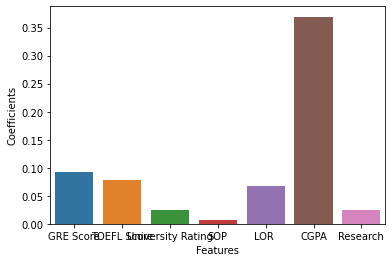

In [ ]:
sns.barplot(x="Features",y="Coefficients",data=coeff)
plt.show()

### **Train Test Split**

In [ ]:
x_train ,  x_test , y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 2)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,0.52,0.392857,0.25,0.250,0.875,0.621795,0.0
490,0.34,0.464286,0.25,0.375,0.875,0.423077,1.0
53,0.68,0.714286,0.75,0.750,0.375,0.416667,1.0
336,0.58,0.642857,0.50,0.500,0.375,0.637821,0.0
154,0.72,0.571429,0.50,0.500,0.625,0.669872,0.0
...,...,...,...,...,...,...,...
22,0.76,0.857143,1.00,1.000,1.000,0.865385,1.0
72,0.62,0.678571,1.00,1.000,1.000,0.849359,1.0
493,0.20,0.107143,0.25,0.500,0.125,0.455128,1.0
15,0.48,0.464286,0.50,0.625,0.375,0.480769,0.0


In [ ]:
y_train

array([0.69, 0.67, 0.72, 0.72, 0.8 , 0.77, 0.72, 0.68, 0.68, 0.69, 0.57,
       0.86, 0.59, 0.77, 0.93, 0.71, 0.89, 0.63, 0.59, 0.73, 0.93, 0.78,
       0.46, 0.77, 0.71, 0.85, 0.72, 0.8 , 0.68, 0.57, 0.95, 0.54, 0.73,
       0.77, 0.47, 0.6 , 0.94, 0.57, 0.93, 0.71, 0.89, 0.65, 0.75, 0.52,
       0.92, 0.65, 0.79, 0.68, 0.75, 0.49, 0.71, 0.83, 0.86, 0.72, 0.8 ,
       0.73, 0.54, 0.89, 0.92, 0.94, 0.63, 0.7 , 0.95, 0.36, 0.71, 0.89,
       0.66, 0.93, 0.8 , 0.53, 0.68, 0.71, 0.68, 0.49, 0.64, 0.77, 0.61,
       0.52, 0.86, 0.9 , 0.91, 0.63, 0.73, 0.62, 0.73, 0.78, 0.91, 0.68,
       0.65, 0.65, 0.74, 0.73, 0.94, 0.75, 0.93, 0.95, 0.7 , 0.88, 0.87,
       0.83, 0.79, 0.88, 0.6 , 0.62, 0.67, 0.84, 0.46, 0.64, 0.58, 0.69,
       0.75, 0.83, 0.42, 0.95, 0.9 , 0.88, 0.47, 0.42, 0.73, 0.72, 0.8 ,
       0.48, 0.79, 0.63, 0.86, 0.94, 0.84, 0.65, 0.84, 0.81, 0.75, 0.67,
       0.71, 0.89, 0.85, 0.69, 0.57, 0.78, 0.34, 0.76, 0.46, 0.56, 0.96,
       0.78, 0.86, 0.67, 0.62, 0.74, 0.65, 0.87, 0.

In [ ]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
129,0.86,0.928571,1.00,1.000,1.000,0.817308,1.0
280,0.42,0.357143,0.50,0.875,0.750,0.589744,1.0
440,0.30,0.428571,0.25,0.375,0.125,0.317308,0.0
384,1.00,0.750000,0.75,1.000,1.000,0.942308,1.0
225,0.12,0.250000,0.25,0.375,0.375,0.394231,0.0
...,...,...,...,...,...,...,...
387,0.34,0.464286,0.25,0.250,0.625,0.416667,0.0
117,0.00,0.428571,0.75,0.250,0.375,0.211538,0.0
468,0.66,0.642857,0.75,0.750,1.000,0.666667,1.0
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0


In [ ]:
y_test

array([0.92, 0.68, 0.53, 0.96, 0.61, 0.65, 0.76, 0.55, 0.47, 0.66, 0.67,
       0.58, 0.53, 0.77, 0.38, 0.7 , 0.69, 0.54, 0.8 , 0.9 , 0.89, 0.74,
       0.71, 0.47, 0.55, 0.89, 0.63, 0.74, 0.62, 0.64, 0.71, 0.95, 0.51,
       0.94, 0.64, 0.77, 0.85, 0.78, 0.68, 0.7 , 0.85, 0.97, 0.83, 0.94,
       0.64, 0.8 , 0.79, 0.97, 0.9 , 0.8 , 0.58, 0.56, 0.9 , 0.74, 0.71,
       0.61, 0.91, 0.57, 0.96, 0.79, 0.62, 0.7 , 0.77, 0.94, 0.73, 0.76,
       0.75, 0.61, 0.46, 0.76, 0.49, 0.64, 0.64, 0.93, 0.82, 0.86, 0.78,
       0.61, 0.37, 0.58, 0.49, 0.76, 0.7 , 0.78, 0.94, 0.73, 0.79, 0.76,
       0.58, 0.8 , 0.72, 0.94, 0.89, 0.57, 0.81, 0.53, 0.45, 0.81, 0.82,
       0.75])

In [ ]:
L = LinearRegression()

In [ ]:
L.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat_mm_tt = L.predict(x_train)
y_hat_mm_tt

array([0.72490918, 0.66708063, 0.6973767 , 0.72737273, 0.76634632,
       0.70645657, 0.73367545, 0.69947742, 0.59950639, 0.65734353,
       0.59143021, 0.83458646, 0.53553718, 0.76673344, 0.88849388,
       0.68546161, 0.82184999, 0.59398176, 0.69206408, 0.7737937 ,
       0.90895854, 0.79490863, 0.42466504, 0.7014694 , 0.60804983,
       0.85800811, 0.74026568, 0.82943654, 0.82469469, 0.5178729 ,
       0.94489934, 0.56031169, 0.73323705, 0.79555169, 0.45318267,
       0.52446705, 0.9601697 , 0.57062618, 0.90845447, 0.6603117 ,
       0.88604392, 0.5994157 , 0.74783162, 0.73782464, 0.89804548,
       0.66212288, 0.82004826, 0.60874732, 0.65210565, 0.50926085,
       0.78540732, 0.84825562, 0.82802427, 0.63243004, 0.78002717,
       0.6808791 , 0.48951235, 0.90817458, 0.89651503, 0.94089823,
       0.70378672, 0.68708814, 0.89334044, 0.53057399, 0.73823258,
       0.86349236, 0.72148021, 0.88836084, 0.74593279, 0.68236381,
       0.69262524, 0.70476936, 0.63827891, 0.51041391, 0.66467

In [ ]:
mm_R2_score_tt = L.score(x,y)
mm_R2_score_tt

0.8214651655098204

In [ ]:
mm_coefficient_tt = L.coef_
mm_coefficient_tt

array([0.10670585, 0.08262225, 0.01936965, 0.00838222, 0.07440081,
       0.35368811, 0.02471331])

In [ ]:
mm_intercept_tt = L.intercept_
mm_intercept_tt

0.34500326942218074

# **Sci-kit Learn Multiple Linear Regression by using StandardScaler**

In [ ]:
x = ss_df.iloc[: , :]

In [ ]:
y = df.iloc[: , -1].values

In [ ]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


In [ ]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
L = LinearRegression()

In [ ]:
L.fit(x,y)

LinearRegression()

In [ ]:
y_hat_ss = L.predict(x)
y_hat_ss

array([0.95188302, 0.80403133, 0.65344812, 0.7445193 , 0.63154964,
       0.87449345, 0.70873689, 0.59658817, 0.55037924, 0.7166568 ,
       0.73230708, 0.8361088 , 0.85258378, 0.64376819, 0.64333755,
       0.64765144, 0.71535936, 0.65773635, 0.73739029, 0.65098033,
       0.61722139, 0.7016542 , 0.92700657, 0.96173916, 0.9588498 ,
       0.9630366 , 0.76315152, 0.51895532, 0.42608928, 0.48762151,
       0.60173397, 0.71664474, 0.92176606, 0.93714633, 0.95539958,
       0.85995516, 0.65453013, 0.53816237, 0.50482378, 0.58365522,
       0.6476116 , 0.65630992, 0.68337649, 0.84196389, 0.88546532,
       0.83497493, 0.89804598, 0.93750178, 0.80611696, 0.75506225,
       0.68278595, 0.61474312, 0.71933504, 0.69304722, 0.65695951,
       0.5898518 , 0.54253815, 0.50480029, 0.43058924, 0.622548  ,
       0.60248697, 0.62091394, 0.64323028, 0.70633145, 0.74818254,
       0.78373966, 0.78968732, 0.73240017, 0.8247072 , 0.8603845 ,
       0.95657045, 0.96154284, 0.89418791, 0.80071339, 0.76281

In [ ]:
ss_R2_score = L.score(x,y)
ss_R2_score

0.8219007395178417

In [ ]:
ss_coefficient = L.coef_
ss_coefficient

array([0.0209711 , 0.01687836, 0.00678723, 0.0015703 , 0.01558631,
       0.07152916, 0.01206592])

In [ ]:
ss_intercept = L.intercept_
ss_intercept

0.7217399999999997

In [ ]:
coeff = pd.DataFrame()                                    # GRE score has highest weight than the other features
X_c = x                                                   # 3rd highest weight is on CGPA score.
coeff["Features"] = X_c.columns
coeff["Coefficients"] = L.coef_
coeff["Coefficients"] = round(coeff["Coefficients"], 5)
coeff

,Features,Coefficients
0,GRE Score,0.02097
1,TOEFL Score,0.01688
2,University Rating,0.00679
3,SOP,0.00157
4,LOR,0.01559
5,CGPA,0.07153
6,Research,0.01207


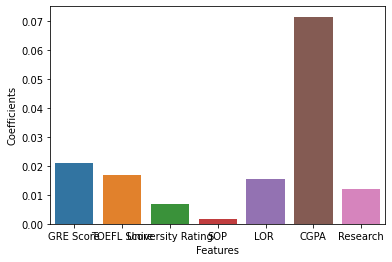

In [ ]:
sns.barplot(x="Features",y="Coefficients",data=coeff)
plt.show()

### **Train Test Split**

In [ ]:
x_train ,  x_test , y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 2)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,-0.041830,-0.689952,-0.975168,-1.387862,1.098944,0.270702,-1.128152
490,-0.839430,-0.360777,-0.975168,-0.882817,1.098944,-0.755436,0.886405
53,0.667148,0.791338,0.775582,0.632315,-1.064332,-0.788537,0.886405
336,0.224037,0.462163,-0.099793,-0.377773,-1.064332,0.353455,-1.128152
154,0.844393,0.132987,-0.099793,-0.377773,0.017306,0.518961,-1.128152
...,...,...,...,...,...,...,...
22,1.021637,1.449690,1.650957,1.642404,1.639763,1.528547,0.886405
72,0.401282,0.626751,1.650957,1.642404,1.639763,1.445794,0.886405
493,-1.459786,-2.006655,-0.975168,-0.377773,-2.145970,-0.589930,0.886405
15,-0.219074,-0.360777,-0.099793,0.127271,-1.064332,-0.457525,-1.128152


In [ ]:
y_train

array([0.69, 0.67, 0.72, 0.72, 0.8 , 0.77, 0.72, 0.68, 0.68, 0.69, 0.57,
       0.86, 0.59, 0.77, 0.93, 0.71, 0.89, 0.63, 0.59, 0.73, 0.93, 0.78,
       0.46, 0.77, 0.71, 0.85, 0.72, 0.8 , 0.68, 0.57, 0.95, 0.54, 0.73,
       0.77, 0.47, 0.6 , 0.94, 0.57, 0.93, 0.71, 0.89, 0.65, 0.75, 0.52,
       0.92, 0.65, 0.79, 0.68, 0.75, 0.49, 0.71, 0.83, 0.86, 0.72, 0.8 ,
       0.73, 0.54, 0.89, 0.92, 0.94, 0.63, 0.7 , 0.95, 0.36, 0.71, 0.89,
       0.66, 0.93, 0.8 , 0.53, 0.68, 0.71, 0.68, 0.49, 0.64, 0.77, 0.61,
       0.52, 0.86, 0.9 , 0.91, 0.63, 0.73, 0.62, 0.73, 0.78, 0.91, 0.68,
       0.65, 0.65, 0.74, 0.73, 0.94, 0.75, 0.93, 0.95, 0.7 , 0.88, 0.87,
       0.83, 0.79, 0.88, 0.6 , 0.62, 0.67, 0.84, 0.46, 0.64, 0.58, 0.69,
       0.75, 0.83, 0.42, 0.95, 0.9 , 0.88, 0.47, 0.42, 0.73, 0.72, 0.8 ,
       0.48, 0.79, 0.63, 0.86, 0.94, 0.84, 0.65, 0.84, 0.81, 0.75, 0.67,
       0.71, 0.89, 0.85, 0.69, 0.57, 0.78, 0.34, 0.76, 0.46, 0.56, 0.96,
       0.78, 0.86, 0.67, 0.62, 0.74, 0.65, 0.87, 0.

In [ ]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
129,1.464749,1.778865,1.650957,1.642404,1.639763,1.280288,0.886405
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405
440,-1.016674,-0.525364,-0.975168,-0.882817,-2.145970,-1.301605,-1.128152
384,2.085104,0.955926,0.775582,1.642404,1.639763,1.925762,0.886405
225,-1.814275,-1.348304,-0.975168,-0.882817,-1.064332,-0.904391,-1.128152
...,...,...,...,...,...,...,...
387,-0.839430,-0.360777,-0.975168,-1.387862,0.017306,-0.788537,-1.128152
117,-2.346008,-0.525364,0.775582,-1.387862,-1.064332,-1.847775,-1.128152
468,0.578526,0.462163,0.775582,0.632315,1.639763,0.502410,0.886405
395,0.667148,0.462163,-0.099793,0.127271,0.017306,0.767220,0.886405


In [ ]:
y_test

array([0.92, 0.68, 0.53, 0.96, 0.61, 0.65, 0.76, 0.55, 0.47, 0.66, 0.67,
       0.58, 0.53, 0.77, 0.38, 0.7 , 0.69, 0.54, 0.8 , 0.9 , 0.89, 0.74,
       0.71, 0.47, 0.55, 0.89, 0.63, 0.74, 0.62, 0.64, 0.71, 0.95, 0.51,
       0.94, 0.64, 0.77, 0.85, 0.78, 0.68, 0.7 , 0.85, 0.97, 0.83, 0.94,
       0.64, 0.8 , 0.79, 0.97, 0.9 , 0.8 , 0.58, 0.56, 0.9 , 0.74, 0.71,
       0.61, 0.91, 0.57, 0.96, 0.79, 0.62, 0.7 , 0.77, 0.94, 0.73, 0.76,
       0.75, 0.61, 0.46, 0.76, 0.49, 0.64, 0.64, 0.93, 0.82, 0.86, 0.78,
       0.61, 0.37, 0.58, 0.49, 0.76, 0.7 , 0.78, 0.94, 0.73, 0.79, 0.76,
       0.58, 0.8 , 0.72, 0.94, 0.89, 0.57, 0.81, 0.53, 0.45, 0.81, 0.82,
       0.75])

In [ ]:
L = LinearRegression()

In [ ]:
L.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat_ss_tt = L.predict(x_train)
y_hat_ss_tt

array([0.72490918, 0.66708063, 0.6973767 , 0.72737273, 0.76634632,
       0.70645657, 0.73367545, 0.69947742, 0.59950639, 0.65734353,
       0.59143021, 0.83458646, 0.53553718, 0.76673344, 0.88849388,
       0.68546161, 0.82184999, 0.59398176, 0.69206408, 0.7737937 ,
       0.90895854, 0.79490863, 0.42466504, 0.7014694 , 0.60804983,
       0.85800811, 0.74026568, 0.82943654, 0.82469469, 0.5178729 ,
       0.94489934, 0.56031169, 0.73323705, 0.79555169, 0.45318267,
       0.52446705, 0.9601697 , 0.57062618, 0.90845447, 0.6603117 ,
       0.88604392, 0.5994157 , 0.74783162, 0.73782464, 0.89804548,
       0.66212288, 0.82004826, 0.60874732, 0.65210565, 0.50926085,
       0.78540732, 0.84825562, 0.82802427, 0.63243004, 0.78002717,
       0.6808791 , 0.48951235, 0.90817458, 0.89651503, 0.94089823,
       0.70378672, 0.68708814, 0.89334044, 0.53057399, 0.73823258,
       0.86349236, 0.72148021, 0.88836084, 0.74593279, 0.68236381,
       0.69262524, 0.70476936, 0.63827891, 0.51041391, 0.66467

In [ ]:
ss_R2_score_tt = L.score(x,y)
ss_R2_score_tt

0.8214651655098203

In [ ]:
ss_coefficient_tt = L.coef_
ss_coefficient_tt

array([0.02408105, 0.01792839, 0.00553181, 0.00207463, 0.01719633,
       0.06849393, 0.01226737])

In [ ]:
ss_intercept_tt = L.intercept_
ss_intercept_tt

0.7229601834968221

# **Metrics checked - MAE, MSE , RMSE, R2, Adj R2**

In [ ]:
MSE = mean_squared_error(y , y_hat_ws , squared = True)
MSE

0.0035407508622541024

In [ ]:
MAE = mean_absolute_error(y , y_hat_ws)
MAE

0.04257239014973329

In [ ]:
RMSE = mean_squared_error(y , y_hat_ws , squared = False)
RMSE

0.059504208777649524

In [ ]:
R2 = r2_score(y , y_hat_ws)
R2

0.8219007395178417

In [ ]:
n = len(df)
d = (df.shape[1] -1)
print("n = ",n)
print("d = ",d)

n =  500
d =  7


In [ ]:
Adj_R2 = 1 - ((1-R2)*(n-1)/(n-d-1))
Adj_R2

0.8193668069500062

# **Train and test performances are checked**

In [ ]:
x = df.iloc[: , :-1]

In [ ]:
y = df.iloc[: , -1].values

In [ ]:
x_train ,  x_test , y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 2)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,316,103,2,2.0,4.5,8.74,0
490,307,105,2,2.5,4.5,8.12,1
53,324,112,4,4.0,2.5,8.10,1
336,319,110,3,3.0,2.5,8.79,0
154,326,108,3,3.0,3.5,8.89,0
...,...,...,...,...,...,...,...
22,328,116,5,5.0,5.0,9.50,1
72,321,111,5,5.0,5.0,9.45,1
493,300,95,2,3.0,1.5,8.22,1
15,314,105,3,3.5,2.5,8.30,0


In [ ]:
y_train

array([0.69, 0.67, 0.72, 0.72, 0.8 , 0.77, 0.72, 0.68, 0.68, 0.69, 0.57,
       0.86, 0.59, 0.77, 0.93, 0.71, 0.89, 0.63, 0.59, 0.73, 0.93, 0.78,
       0.46, 0.77, 0.71, 0.85, 0.72, 0.8 , 0.68, 0.57, 0.95, 0.54, 0.73,
       0.77, 0.47, 0.6 , 0.94, 0.57, 0.93, 0.71, 0.89, 0.65, 0.75, 0.52,
       0.92, 0.65, 0.79, 0.68, 0.75, 0.49, 0.71, 0.83, 0.86, 0.72, 0.8 ,
       0.73, 0.54, 0.89, 0.92, 0.94, 0.63, 0.7 , 0.95, 0.36, 0.71, 0.89,
       0.66, 0.93, 0.8 , 0.53, 0.68, 0.71, 0.68, 0.49, 0.64, 0.77, 0.61,
       0.52, 0.86, 0.9 , 0.91, 0.63, 0.73, 0.62, 0.73, 0.78, 0.91, 0.68,
       0.65, 0.65, 0.74, 0.73, 0.94, 0.75, 0.93, 0.95, 0.7 , 0.88, 0.87,
       0.83, 0.79, 0.88, 0.6 , 0.62, 0.67, 0.84, 0.46, 0.64, 0.58, 0.69,
       0.75, 0.83, 0.42, 0.95, 0.9 , 0.88, 0.47, 0.42, 0.73, 0.72, 0.8 ,
       0.48, 0.79, 0.63, 0.86, 0.94, 0.84, 0.65, 0.84, 0.81, 0.75, 0.67,
       0.71, 0.89, 0.85, 0.69, 0.57, 0.78, 0.34, 0.76, 0.46, 0.56, 0.96,
       0.78, 0.86, 0.67, 0.62, 0.74, 0.65, 0.87, 0.

In [ ]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
129,333,118,5,5.0,5.0,9.35,1
280,311,102,3,4.5,4.0,8.64,1
440,305,104,2,2.5,1.5,7.79,0
384,340,113,4,5.0,5.0,9.74,1
225,296,99,2,2.5,2.5,8.03,0
...,...,...,...,...,...,...,...
387,307,105,2,2.0,3.5,8.10,0
117,290,104,4,2.0,2.5,7.46,0
468,323,110,4,4.0,5.0,8.88,1
395,324,110,3,3.5,3.5,9.04,1


In [ ]:
y_test

array([0.92, 0.68, 0.53, 0.96, 0.61, 0.65, 0.76, 0.55, 0.47, 0.66, 0.67,
       0.58, 0.53, 0.77, 0.38, 0.7 , 0.69, 0.54, 0.8 , 0.9 , 0.89, 0.74,
       0.71, 0.47, 0.55, 0.89, 0.63, 0.74, 0.62, 0.64, 0.71, 0.95, 0.51,
       0.94, 0.64, 0.77, 0.85, 0.78, 0.68, 0.7 , 0.85, 0.97, 0.83, 0.94,
       0.64, 0.8 , 0.79, 0.97, 0.9 , 0.8 , 0.58, 0.56, 0.9 , 0.74, 0.71,
       0.61, 0.91, 0.57, 0.96, 0.79, 0.62, 0.7 , 0.77, 0.94, 0.73, 0.76,
       0.75, 0.61, 0.46, 0.76, 0.49, 0.64, 0.64, 0.93, 0.82, 0.86, 0.78,
       0.61, 0.37, 0.58, 0.49, 0.76, 0.7 , 0.78, 0.94, 0.73, 0.79, 0.76,
       0.58, 0.8 , 0.72, 0.94, 0.89, 0.57, 0.81, 0.53, 0.45, 0.81, 0.82,
       0.75])

In [ ]:
L = LinearRegression()

In [ ]:
L.fit(x_train,y_train)

LinearRegression()

In [ ]:
predict_train= L.predict(x_train)
predict_test= L.predict(x_test)

print("r2_score of train data=",r2_score(y_train, predict_train).round(3))
print("r2_score of test data=",r2_score(y_test, predict_test).round(3))
print()
print("mean_squared_error of train data=",mean_squared_error(y_train, predict_train , squared = True).round(3))
print("mean_squared_error of test data=",mean_squared_error(y_test, predict_test , squared =True).round(3))
print()
print("mean_absolute_error of train data=",mean_absolute_error(y_train, predict_train).round(3))
print("mean_absolute_error of test data=",mean_absolute_error(y_test, predict_test).round(3))
print()
print("root_mean_squared_error of train data=",mean_squared_error(y_train, predict_train , squared = False).round(3))
print("root_mean_squared_error of test data=",mean_squared_error(y_test, predict_test , squared = False).round(3))
print()

r2_score of train data= 0.829
r2_score of test data= 0.793

mean_squared_error of train data= 0.003
mean_squared_error of test data= 0.004

mean_absolute_error of train data= 0.041
mean_absolute_error of test data= 0.047

root_mean_squared_error of train data= 0.058
root_mean_squared_error of test data= 0.067



**Comments on the performance measures**


*   R2 score of train data and test data is almost same there is only the difference of 0.03
*   A value of 0.8 for R-square score sounds good. It means linear regression model is performing pretty good.

*   Mean square error and mean absolute error is almost zero it means that model is pefectly build.
* linear regression model is performing very well on the unseen data which is test data.






# **Ridge Regression**

In [ ]:
x = df.iloc[ : , :-1]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
R = Ridge(alpha = 0.001)

In [ ]:
R.fit(x,y)

Ridge(alpha=0.001)

In [ ]:
y_predict_ws = R.predict(x)
y_predict_ws

array([0.95188262, 0.8040314 , 0.65344936, 0.74451932, 0.63154968,
       0.87449312, 0.70873836, 0.59658909, 0.55037853, 0.71665729,
       0.73230814, 0.83610899, 0.85258381, 0.64376938, 0.64333767,
       0.64765188, 0.71535921, 0.65773814, 0.73739013, 0.65097928,
       0.61722257, 0.7016557 , 0.92700627, 0.9617388 , 0.95884877,
       0.96303689, 0.76315216, 0.51895554, 0.42608991, 0.48762337,
       0.60173298, 0.71664616, 0.92176604, 0.9371459 , 0.95539797,
       0.85995476, 0.6545296 , 0.53816216, 0.50482525, 0.58365741,
       0.64761278, 0.6563101 , 0.6833756 , 0.84196486, 0.8854646 ,
       0.83497476, 0.89804591, 0.93750174, 0.8061169 , 0.75506386,
       0.68278568, 0.61474346, 0.71933881, 0.69304958, 0.65696186,
       0.58985428, 0.54254089, 0.50480115, 0.43059196, 0.62254743,
       0.60248707, 0.62091414, 0.64322988, 0.70633136, 0.74818305,
       0.78373991, 0.78968712, 0.73239967, 0.82470551, 0.86038462,
       0.95657015, 0.96154201, 0.89418689, 0.80071237, 0.76281

In [ ]:
print("Coefficients:",list(zip(x.columns, R.coef_)))

Coefficients: [('GRE Score', 0.0018585760494081712), ('TOEFL Score', 0.002778049129099784), ('University Rating', 0.005941540284708144), ('SOP', 0.0015864348207139036), ('LOR ', 0.016858954172045144), ('CGPA', 0.11838201952093026), ('Research', 0.024307244732457083)]


In [ ]:
print("Intercepts:",R.intercept_.round(2))

Intercepts: -1.28


In [ ]:
R2 = r2_score(y , y_predict_ws)
print("Ridge R2_score:",R2.round(5))

Ridge R2_score: 0.8219


In [ ]:
MSE = mean_squared_error(y , y_predict_ws , squared = True)
MSE

0.003540750862972982

In [ ]:
MAE = mean_absolute_error(y , y_predict_ws)
MAE

0.04257238105113895

In [ ]:
RMSE = mean_squared_error(y , y_predict_ws , squared = False)
RMSE

0.0595042087836901

# **Lasso Regression**

In [ ]:
x = df.iloc[ : , :-1]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
L = Lasso(alpha = 0.001)

In [ ]:
L.fit(x,y)

Lasso(alpha=0.001)

In [ ]:
y_predict = L.predict(x)
y_predict

array([0.95099825, 0.80203088, 0.65527677, 0.74421789, 0.63541148,
       0.87295912, 0.71218511, 0.60051382, 0.5510494 , 0.72206781,
       0.73451564, 0.8352745 , 0.85151168, 0.64370213, 0.64132678,
       0.65146211, 0.71726992, 0.6613089 , 0.73967733, 0.64787335,
       0.61927524, 0.71160458, 0.92368601, 0.95973644, 0.95659137,
       0.96453433, 0.76702827, 0.51645764, 0.42876843, 0.4970727 ,
       0.59420817, 0.71962849, 0.92353868, 0.93675581, 0.94919229,
       0.85452657, 0.65197005, 0.54085425, 0.51182345, 0.59119037,
       0.64822102, 0.65635099, 0.68008326, 0.84919096, 0.88130917,
       0.83116385, 0.89631772, 0.94261919, 0.80393926, 0.7597206 ,
       0.67891267, 0.61454742, 0.7318448 , 0.6995697 , 0.66817655,
       0.60089996, 0.55451067, 0.5069749 , 0.43546889, 0.62467708,
       0.60456813, 0.62180634, 0.63875669, 0.70390066, 0.75437209,
       0.78837886, 0.79456475, 0.72907651, 0.81759258, 0.8596568 ,
       0.95408926, 0.95762888, 0.88713409, 0.79362558, 0.76153

In [ ]:
print("Coefficients:",list(zip(x.columns, L.coef_)))

Coefficients: [('GRE Score', 0.0022385100794826336), ('TOEFL Score', 0.003085115773369587), ('University Rating', 0.006107092852439455), ('SOP', 0.001609461934547608), ('LOR ', 0.016926188298249198), ('CGPA', 0.10913556105553762), ('Research', 0.019041971237721094)]


In [ ]:
print("Intercepts:",L.intercept_.round(2))

Intercepts: -1.35


In [ ]:
R2 = r2_score(y , y_predict)
print("LASSO R2_score:",R2.round(5))

LASSO R2_score: 0.82122


In [ ]:
MSE = mean_squared_error(y , y_predict , squared = True)
MSE

0.0035543176098293654

In [ ]:
MAE = mean_absolute_error(y , y_predict)
MAE

0.04255656654513044

In [ ]:
RMSE = mean_squared_error(y , y_predict , squared = False)
RMSE

0.059618098005801604

# **Testing the assumptions of the Linear Regression Model**

### **1st Assumption - Linear Relationship**

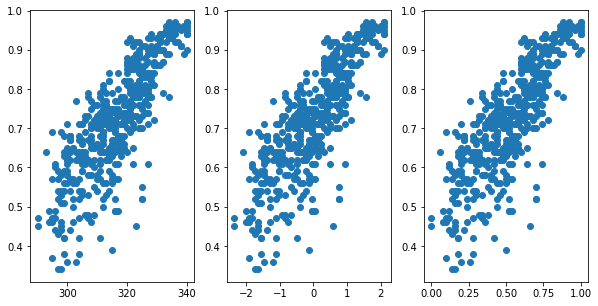

In [ ]:
plt.rcParams["figure.figsize"]=(10,5) 
fig,((ax1,ax2,ax3))=plt.subplots(1,3)
ax1.scatter(df["GRE Score"] ,y)
ax2.scatter(ss_df["GRE Score"] ,y)
ax3.scatter(mm_df["GRE Score"] ,y)
plt.show()

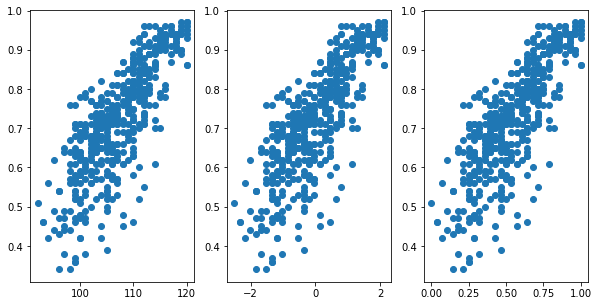

In [ ]:
plt.rcParams["figure.figsize"]=(10,5) 
fig,((ax1,ax2,ax3))=plt.subplots(1,3)
ax1.scatter(df["TOEFL Score"] ,y)
ax2.scatter(ss_df["TOEFL Score"] ,y)
ax3.scatter(mm_df["TOEFL Score"] ,y)
plt.show()

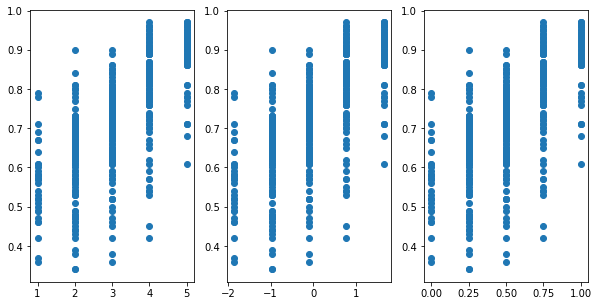

In [ ]:
plt.rcParams["figure.figsize"]=(10,5) 
fig,((ax1,ax2,ax3))=plt.subplots(1,3)
ax1.scatter(df["University Rating"] ,y)
ax2.scatter(ss_df["University Rating"] ,y)
ax3.scatter(mm_df["University Rating"] ,y)
plt.show()

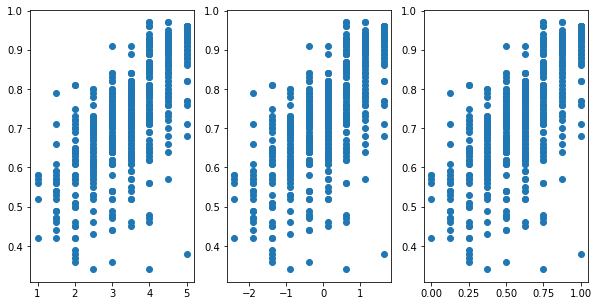

In [ ]:
plt.rcParams["figure.figsize"]=(10,5) 
fig,((ax1,ax2,ax3))=plt.subplots(1,3)
ax1.scatter(df["SOP"] ,y)
ax2.scatter(ss_df["SOP"] ,y)
ax3.scatter(mm_df["SOP"] ,y)
plt.show()

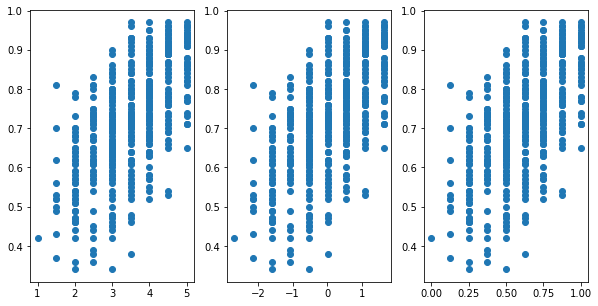

In [ ]:
plt.rcParams["figure.figsize"]=(10,5) 
fig,((ax1,ax2,ax3))=plt.subplots(1,3)
ax1.scatter(df["LOR "] ,y)
ax2.scatter(ss_df["LOR "] ,y)
ax3.scatter(mm_df["LOR "] ,y)
plt.show()

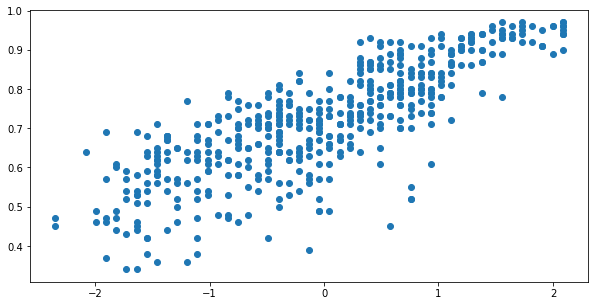

In [ ]:
plt.scatter(ss_df["GRE Score"] ,y)

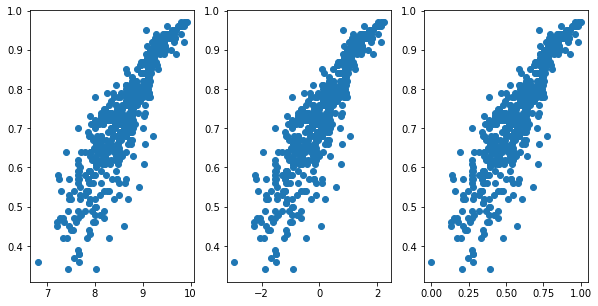

In [ ]:
plt.rcParams["figure.figsize"]=(10,5) 
fig,((ax1,ax2,ax3))=plt.subplots(1,3)
ax1.scatter(df["CGPA"] ,y)
ax2.scatter(ss_df["CGPA"] ,y)
ax3.scatter(mm_df["CGPA"] ,y)
plt.show()

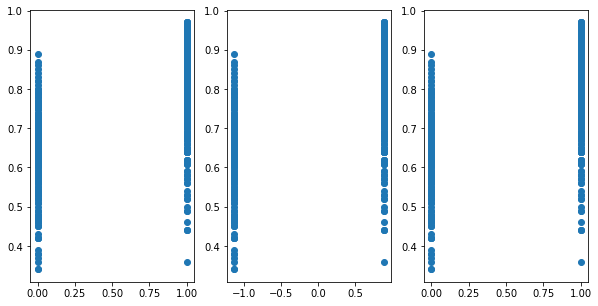

In [ ]:
plt.rcParams["figure.figsize"]=(10,5) 
fig,((ax1,ax2,ax3))=plt.subplots(1,3)
ax1.scatter(df["Research"] ,y)
ax2.scatter(ss_df["Research"] ,y)
ax3.scatter(mm_df["Research"] ,y)
plt.show()

### **2nd Assumption - MultiCollinearity**

In [ ]:
{x.columns[i]: variance_inflation_factor(x.values , i) for i in range (0 , x.shape[1])}

{'GRE Score': 1308.0610888465158,
 'TOEFL Score': 1215.9518983651624,
 'University Rating': 20.933360945720892,
 'SOP': 35.265005604600034,
 'LOR ': 30.91147635400442,
 'CGPA': 950.8179853694207,
 'Research': 2.8694933174820076}

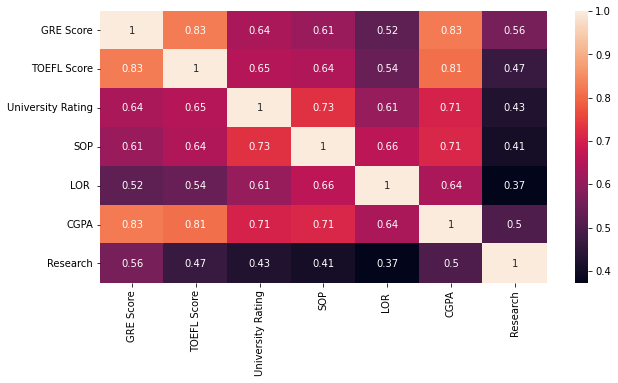

In [ ]:
sns.heatmap(df.iloc[ : , :-1].corr() , annot = True)
plt.show()

In [ ]:
vif = []

for i in range (x.shape[1]):

  vif.append(variance_inflation_factor(x.values,i))

In [ ]:
pd.DataFrame({"vif" : vif} , index = df.columns[ :-1]).T

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
vif,1308.061089,1215.951898,20.933361,35.265006,30.911476,950.817985,2.869493


In [ ]:
vif = pd.DataFrame()
X_t = x
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,1308.06
1,TOEFL Score,1215.95
5,CGPA,950.82
3,SOP,35.27
4,LOR,30.91
2,University Rating,20.93
6,Research,2.87


### **3rd Assumption - Normality of  Residuals**

In [ ]:
y_hat_ws

array([0.95188302, 0.80403133, 0.65344812, 0.7445193 , 0.63154964,
       0.87449345, 0.70873689, 0.59658817, 0.55037924, 0.7166568 ,
       0.73230708, 0.8361088 , 0.85258378, 0.64376819, 0.64333755,
       0.64765144, 0.71535936, 0.65773635, 0.73739029, 0.65098033,
       0.61722139, 0.7016542 , 0.92700657, 0.96173916, 0.9588498 ,
       0.9630366 , 0.76315152, 0.51895532, 0.42608928, 0.48762151,
       0.60173397, 0.71664474, 0.92176606, 0.93714633, 0.95539958,
       0.85995516, 0.65453013, 0.53816237, 0.50482378, 0.58365522,
       0.6476116 , 0.65630992, 0.68337649, 0.84196389, 0.88546532,
       0.83497493, 0.89804598, 0.93750178, 0.80611696, 0.75506225,
       0.68278595, 0.61474312, 0.71933504, 0.69304722, 0.65695951,
       0.5898518 , 0.54253815, 0.50480029, 0.43058924, 0.622548  ,
       0.60248697, 0.62091394, 0.64323028, 0.70633145, 0.74818254,
       0.78373966, 0.78968732, 0.73240017, 0.8247072 , 0.8603845 ,
       0.95657045, 0.96154284, 0.89418791, 0.80071339, 0.76281

In [ ]:
residual = y - y_hat_ws
residual

array([-3.18830204e-02, -4.40313294e-02,  6.65518841e-02,  5.54806986e-02,
        1.84503635e-02,  2.55065542e-02,  4.12631078e-02,  8.34118339e-02,
       -5.03792435e-02, -2.66656802e-01, -2.12307080e-01,  3.89120468e-03,
       -7.25837795e-02, -2.37681858e-02, -3.33375494e-02, -1.07651439e-01,
       -5.53593647e-02, -7.73634646e-03, -1.07390294e-01, -3.09803325e-02,
        2.27786117e-02, -1.65419553e-03,  1.29934328e-02, -1.17391628e-02,
        1.11501987e-02, -2.30366000e-02, -3.15152325e-03, -7.89553216e-02,
        3.39107250e-02,  5.23784887e-02,  4.82660284e-02,  2.33552604e-02,
       -1.17660573e-02, -3.71463257e-02, -1.53995756e-02,  2.00448351e-02,
       -1.45301339e-02,  4.18376292e-02,  1.51762156e-02, -1.03655222e-01,
       -1.87611596e-01, -1.66309920e-01, -1.53376490e-01,  2.80361136e-02,
        2.45346794e-02,  4.50250698e-02, -3.80459807e-02, -4.75017767e-02,
        1.38830396e-02,  2.49377454e-02,  7.72140482e-02, -5.47431209e-02,
        6.06649643e-02,  

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


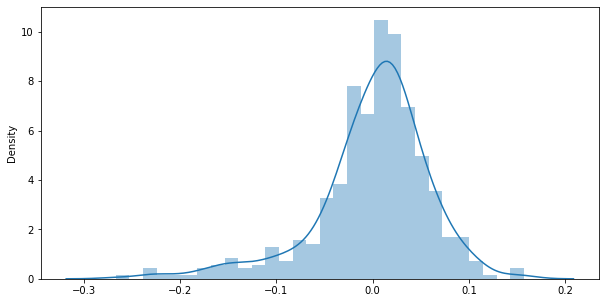

In [ ]:
sns.distplot(residual)
plt.show()

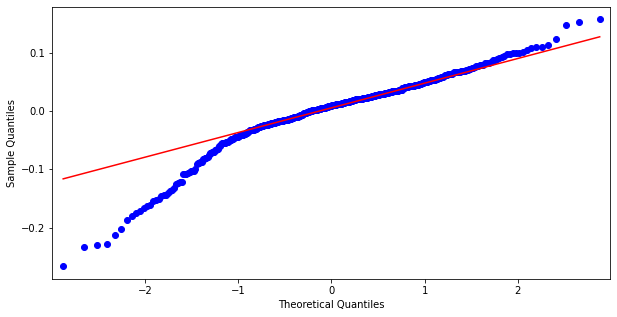

In [ ]:
sm.qqplot(residual , line = "q")
plt.show()

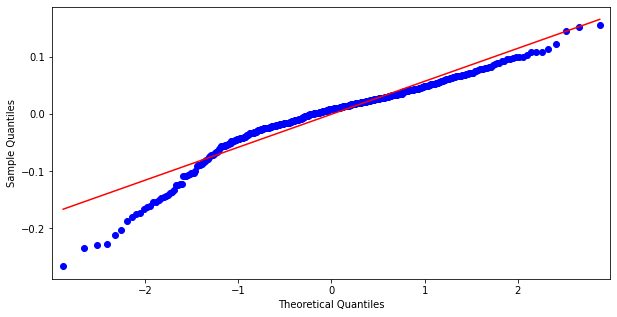

In [ ]:
sm.qqplot(residual , line = "r")
plt.show()

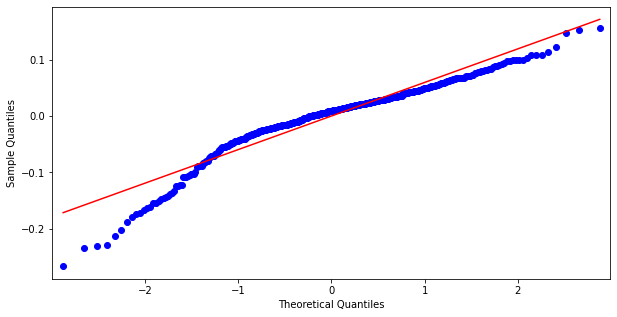

In [ ]:
sm.qqplot(residual , line = "s")
plt.show()

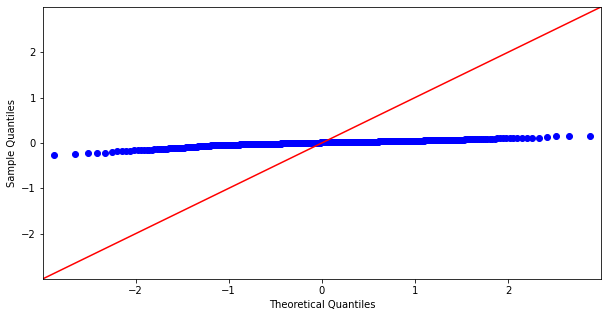

In [ ]:
sm.qqplot(residual , line = "45")
plt.show()

In [ ]:
np.mean(residual)

-5.702105454474804e-16

### **4th Assumption - Homoscedasticity**

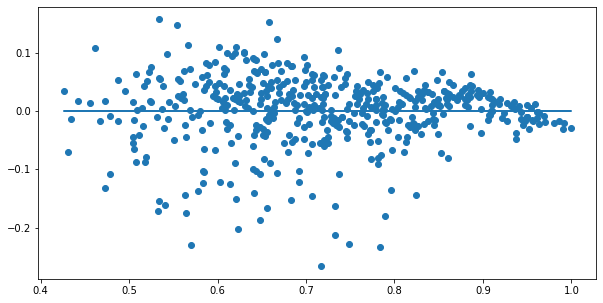

In [ ]:
plt.scatter(y_hat_ws , residual)
plt.plot(y_hat_ws,[0]*len(y_hat_ws))
plt.show()

### **5th Assumption - Autocorrelation of Residuals**

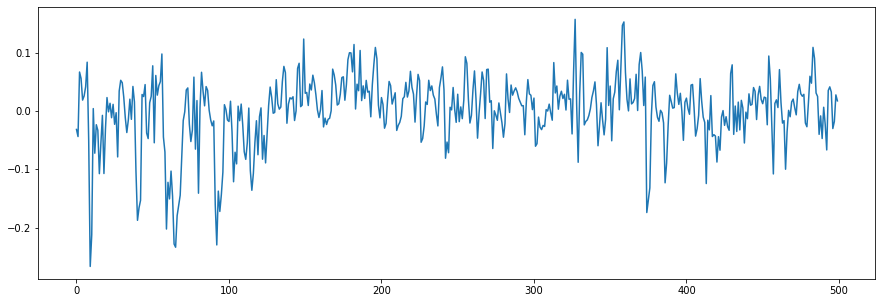

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(residual)
plt.show()

# **Actionable Insights & Recommendations:-**


1.   The linear regression model or a feature where students/learners can come to their website and check if their probability of getting into the IVY league college has built and this model gives 81% true result or we can say the probability of getting admition.

2.   One recommendation while collecting the data we can create one more column of city or region names so that we can get the target audience from those particular regions and marketing can be done according to that region.

3.   This model is useful to attract a maximum number of audience or students/learners and jamboree will get the basic information about that audience for the marketing purpose.

4.   With the help of this model, Jamboree can get the list of student/learner who has less chance to admit and  Jamboree can offer them coaching and help them to get into their dream universities. This point is very useful from a business perspective.







